## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

titanic_main_dataset = pd.read_csv('titanic.csv')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [16]:
titanic_main_dataset = pd.read_csv('titanic.csv')
info = titanic_main_dataset.describe()
print(info)
sizes = titanic_main_dataset.shape
print(sizes)
datatipes = titanic_main_dataset.info()
print(datatipes)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [17]:
(titanic_main_dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ваші висновки:


Найбільше пропущених в Age і Cabin. Cabin не є релевантним значенням.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



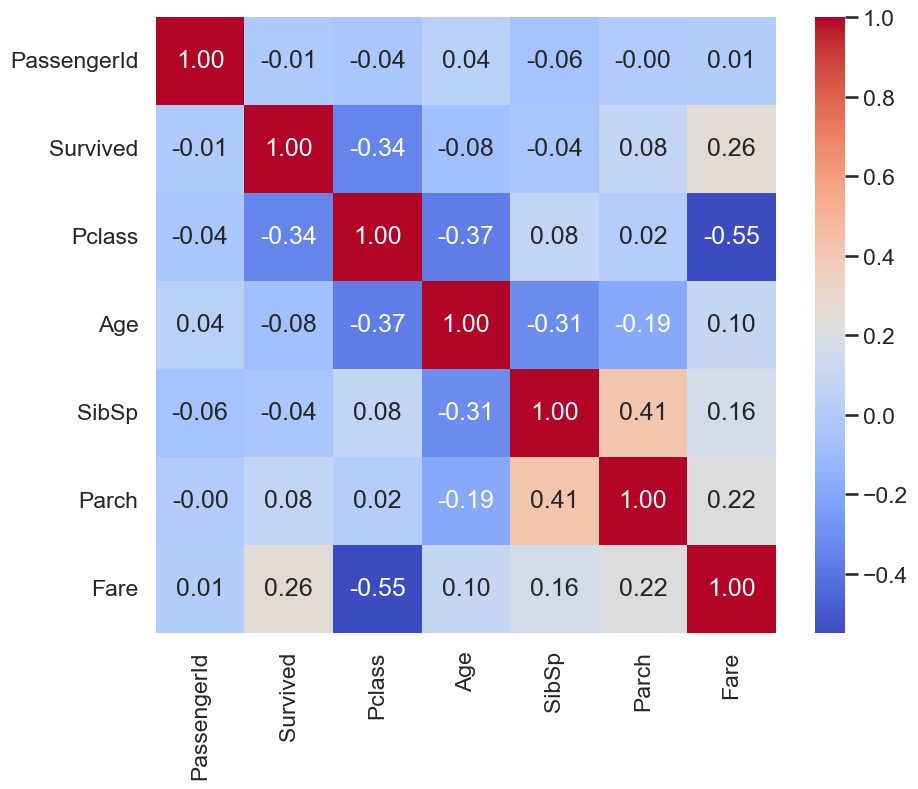

In [18]:



correlation_matrix_fixed = titanic_main_dataset.select_dtypes(include=[np.number]).corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_fixed, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()




Ваші висновки:

Квитки вищого класу були дорожчі.
Ті хто мав братів сестер на борту ну
В дорожчих класах було більше старих людей.


**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [19]:
titanic_main_dataset = pd.read_csv('titanic.csv')

def fiilemty(ds, column, grouping_columns):
    ds[column] = ds.groupby(grouping_columns)[column].transform(lambda x: x.fillna(x.median()))

    if titanic_main_dataset['Age'].isnull().sum() > 0:
        ds[column] = ds[column].fillna(ds[column].median())

    return ds


fiilemty(titanic_main_dataset, 'Age', ['Pclass', 'Embarked'])


(titanic_main_dataset['Age'].isnull().sum())

0

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





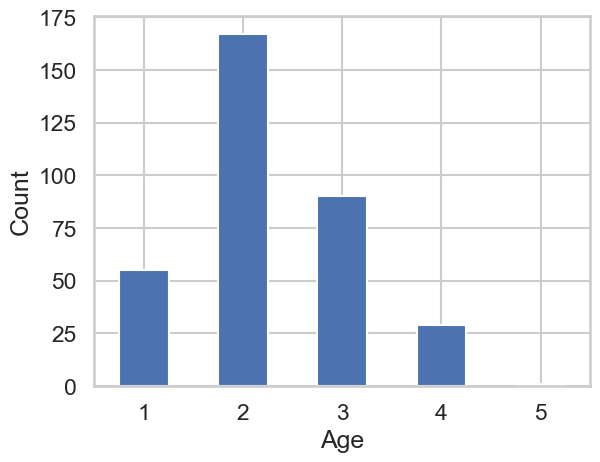

In [20]:
titanic_main_dataset['Age_bin'] = pd.cut(titanic_main_dataset['Age'], bins = [0, 16, 32, 48, 64, 80], labels=["1", "2", "3", "4", "5"])

survive = titanic_main_dataset.groupby('Age_bin', observed=True)['Survived'].sum()
survive.plot(kind='bar')
plt.title('')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Ваші висновки:

більшість 16-32

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

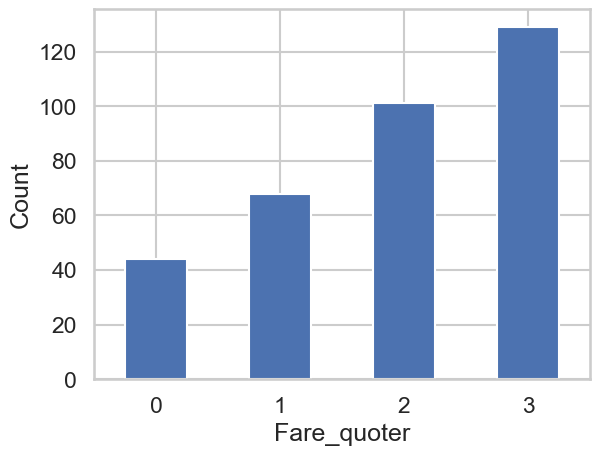

In [21]:
titanic_main_dataset['Fare_quoter'] = pd.qcut(titanic_main_dataset['Fare'], 4, labels=False)
surv_f = titanic_main_dataset.groupby('Fare_quoter')["Survived"].sum()

surv_f.plot(kind='bar')

plt.title('')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Ваші висновки:

гіпотеза вірна. менш заможних людей рятували менш охоче.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [22]:
titanic_main_dataset['Family_size'] = titanic_main_dataset['SibSp'] + titanic_main_dataset['Parch']
titanic_main_dataset['Alone'] = (titanic_main_dataset['Family_size'] == 0)

titanic_main_dataset[['Family_size', 'Alone']]
# titanic_main_dataset[['Family_size', 'Alone']].describe()
# titanic_main_dataset[['Family_size', 'Alone']].value_counts()

,Family_size,Alone
0,1,False
1,1,False
2,0,True
3,1,False
4,0,True
...,...,...
886,0,True
887,0,True
888,3,False
889,0,True


Ваші висновки:

найбільше людей було без сімї.
7 людей подорожувало з 10 членами сім'ї на борту.
в середньому 0.9 людей був розмір сім'ї.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [23]:
titanic_main_dataset = pd.read_csv('titanic.csv')

titanic_main_dataset = titanic_main_dataset.drop(["Cabin", "Ticket"], axis=1)
titanic_main_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


Ваші висновки: бо тікет має кожне значення унікальне тому його неможливо використати для аналітики. значення кабін має дуже багато пропущених значень 

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [24]:
titanic_main_dataset = pd.read_csv('titanic.csv')

titanic_main_dataset['Sex'] = (titanic_main_dataset['Sex'] == 'male').astype(int)

def embarkernumbers(evalue):
    match evalue:
            case 'C':
                return 1
            case 'Q':
                return 2
            case 'S':
                return 3
            case _:
                return 0
     
titanic_main_dataset['Embarked'] = titanic_main_dataset["Embarked"].apply(embarkernumbers)

titanic_main_dataset[['Embarked', 'Sex']]

,Embarked,Sex
0,3,1
1,1,0
2,3,0
3,3,0
4,3,1
...,...,...
886,3,1
887,3,0
888,3,0
889,1,1


Ваші висновки: треба перетворювати різними методами

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



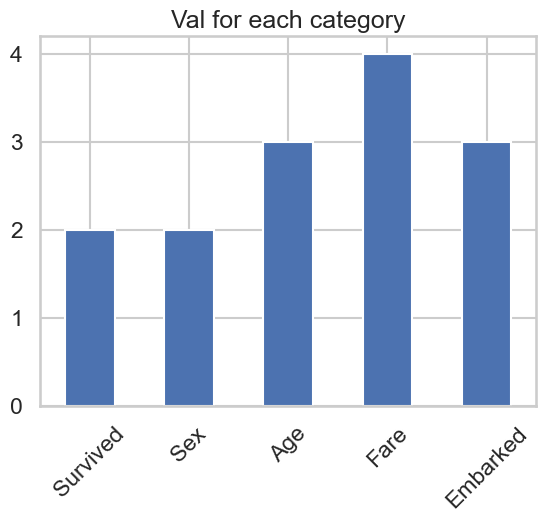

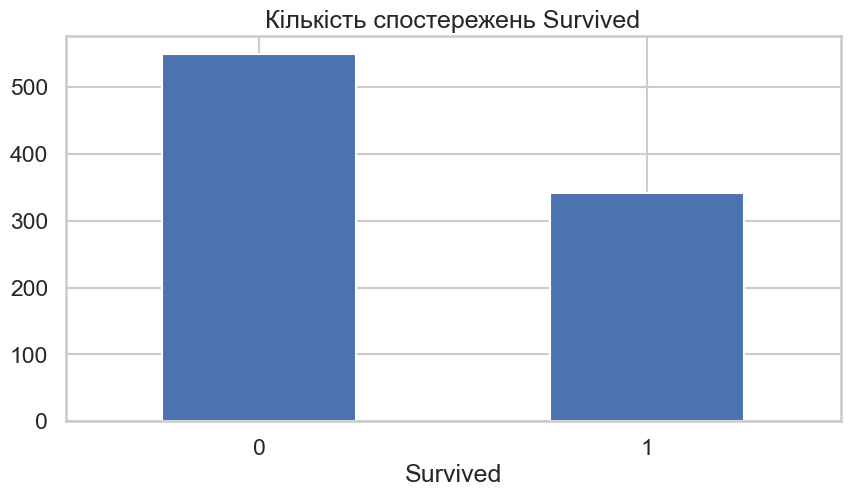

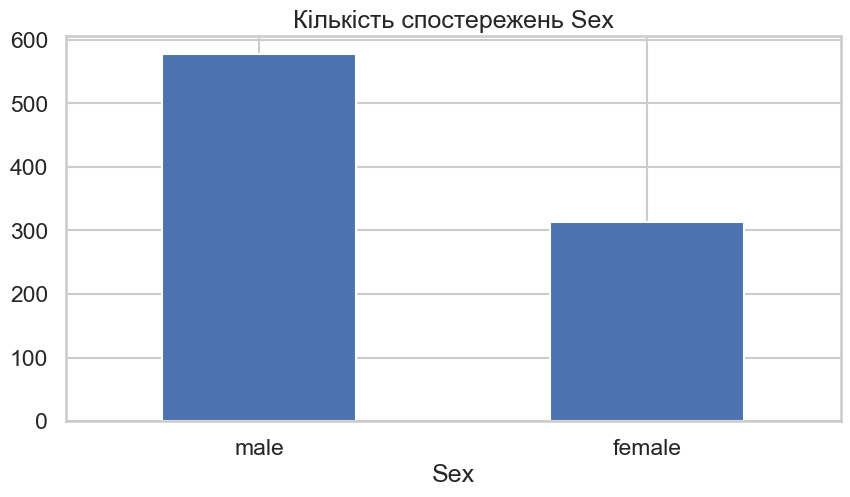

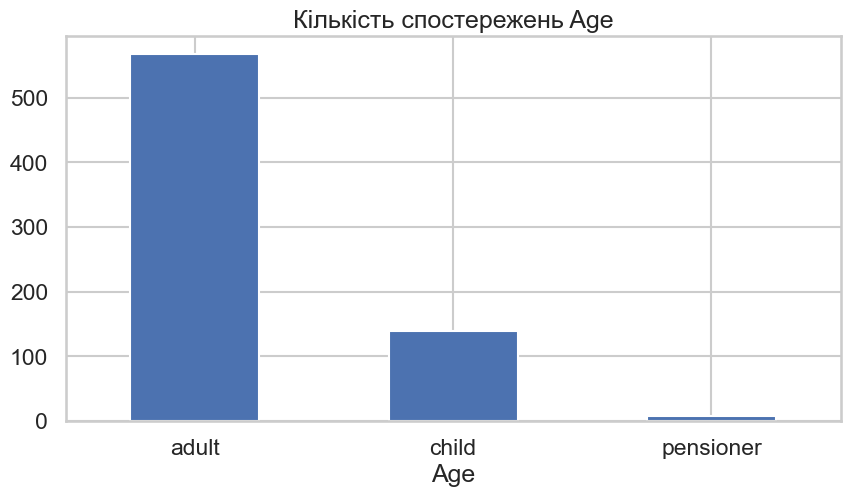

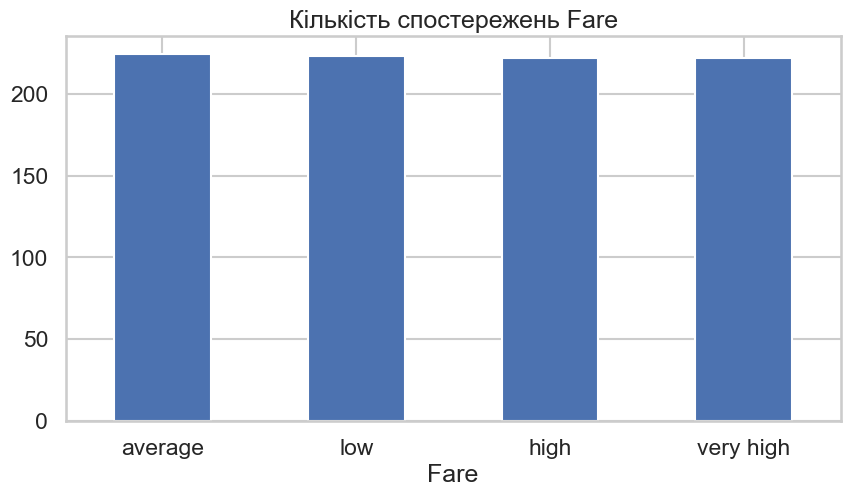

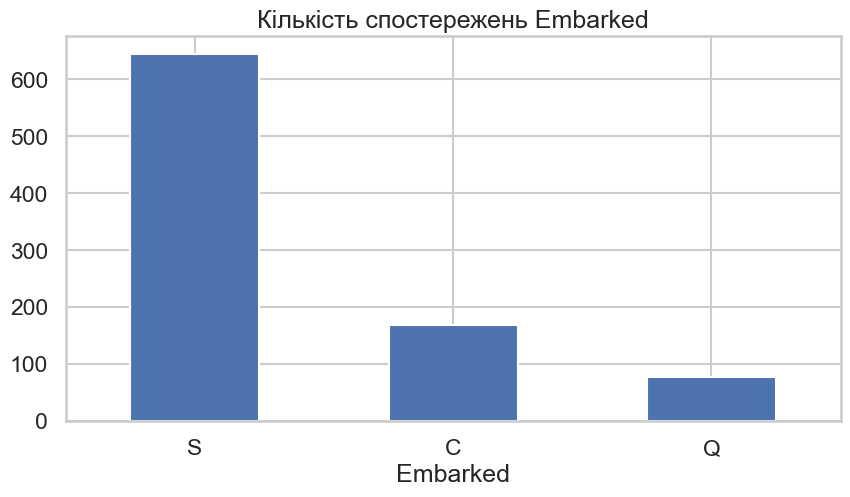

In [25]:
titanic_main_dataset = pd.read_csv('titanic.csv')

titanic_main_dataset['Survived'] = titanic_main_dataset['Survived'].astype('category')
titanic_main_dataset['Sex'] = titanic_main_dataset['Sex'].astype('category')
titanic_main_dataset['Embarked'] = titanic_main_dataset['Embarked'].astype('category')

titanic_main_dataset['Age'] = pd.cut(titanic_main_dataset['Age'], bins=[0, 18, 65, 81], labels=['child', 'adult', 'pensioner'])
titanic_main_dataset['Fare'] = pd.qcut(titanic_main_dataset['Fare'], 4, labels=['low', 'average', 'high', 'very high'])

titanic_main_dataset['Age'] = titanic_main_dataset['Age'].astype('category')
titanic_main_dataset['Fare'] = titanic_main_dataset['Fare'].astype('category')


categoris = titanic_main_dataset.select_dtypes(include=['category'])

def categorid(value):
    return value.nunique()

# categoris.apply(categorid)


categoris.apply(categorid).plot(kind='bar')

plt.title('Val for each category')
plt.xticks(rotation=45)
plt.show()



for column in categoris.columns:
    value_counts = categoris[column].value_counts()
    
    plt.figure(figsize=(10, 5))
    value_counts.plot(kind='bar')
    plt.title(f'Кількість спостережень {column}')
    plt.xticks(rotation=0)
    plt.show()

Ваші висновки:

найбільше спостережень для Age -- дорослі
найбільше спостережень для Embarked -- S
найбільше значень має категорія Fare

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

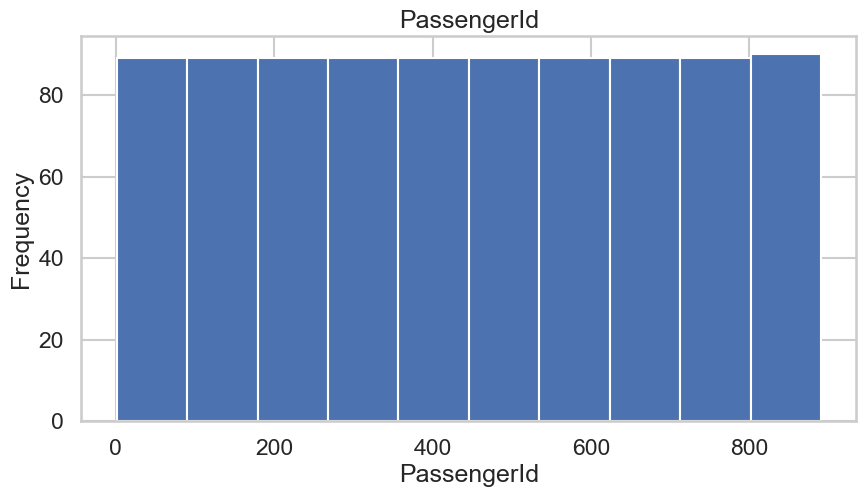

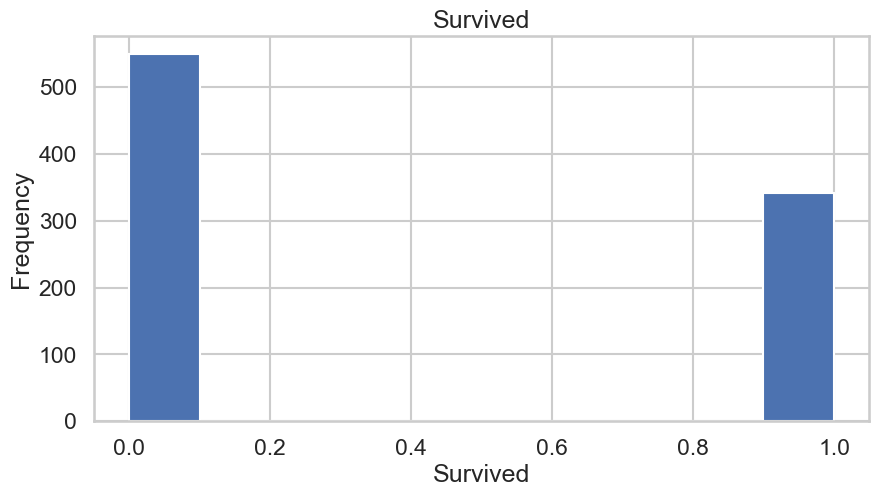

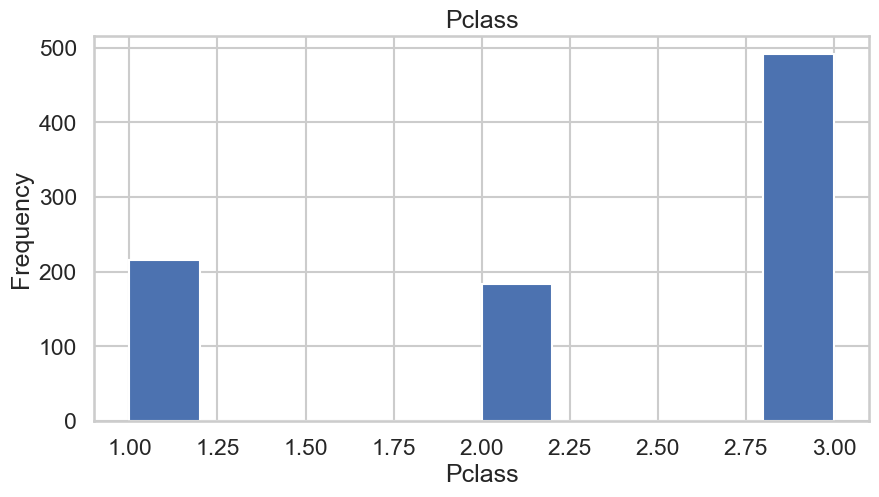

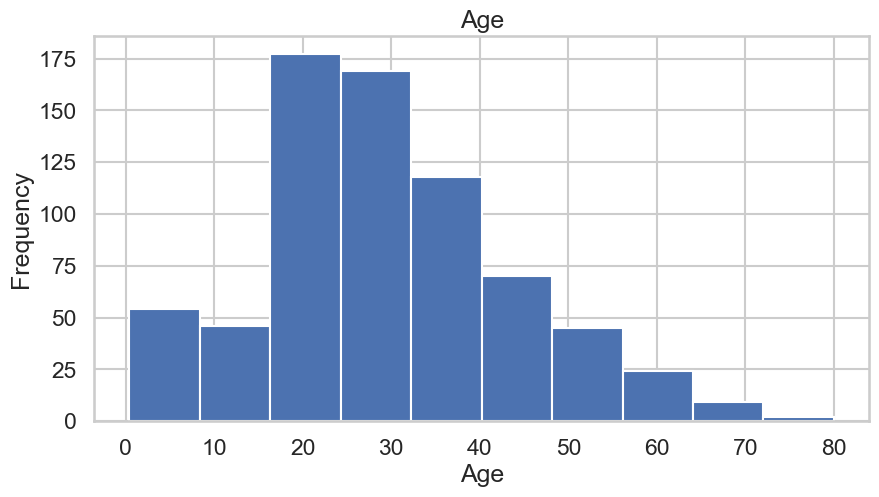

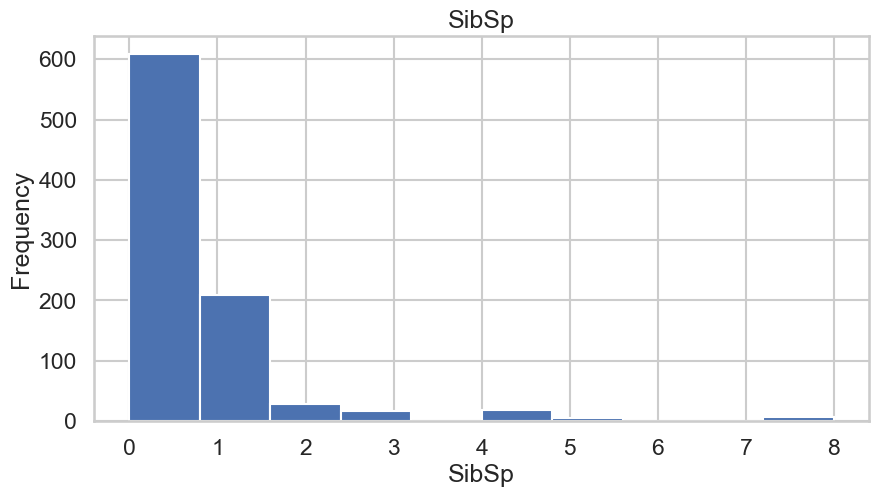

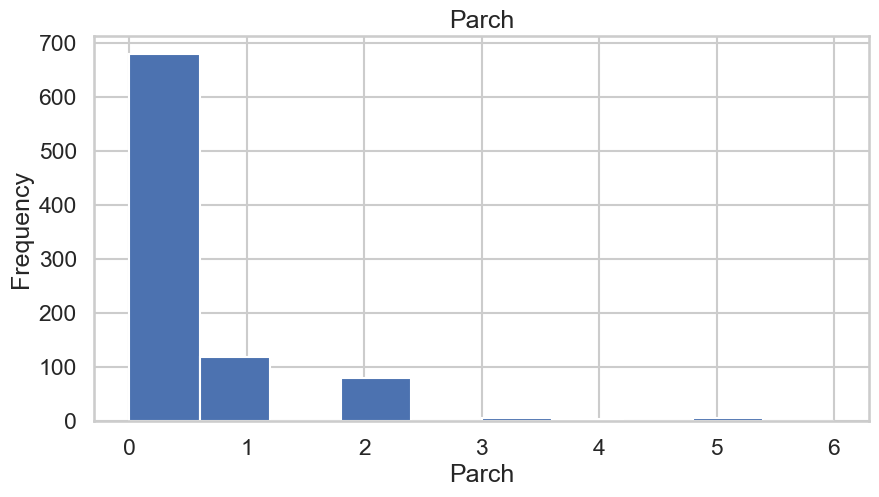

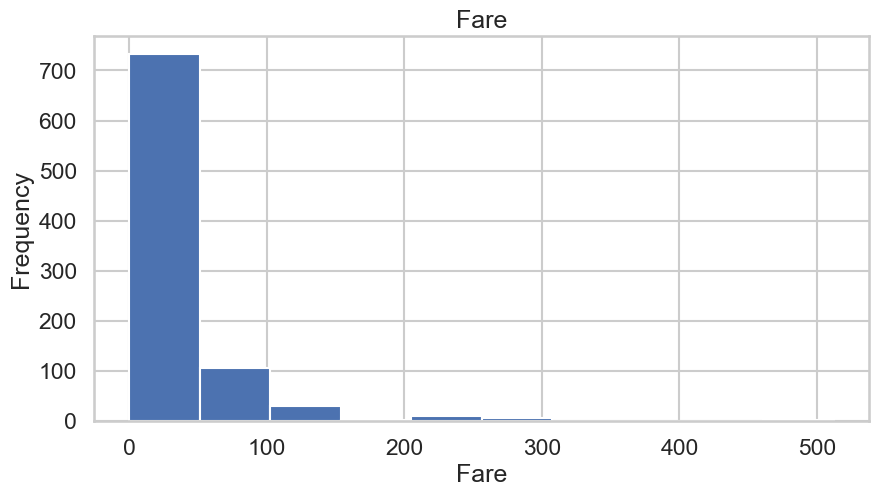

In [26]:
titanic_main_dataset = pd.read_csv('titanic.csv')
numericcols = titanic_main_dataset.select_dtypes(include=['number'])


for column in numericcols.columns:
    plt.figure(figsize=(10, 5))
    titanic_main_dataset[column].plot(kind='hist')
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

найпродованіші дешеві квитки
більшість людей подорожували самі
найбільше людей 20-40 років

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

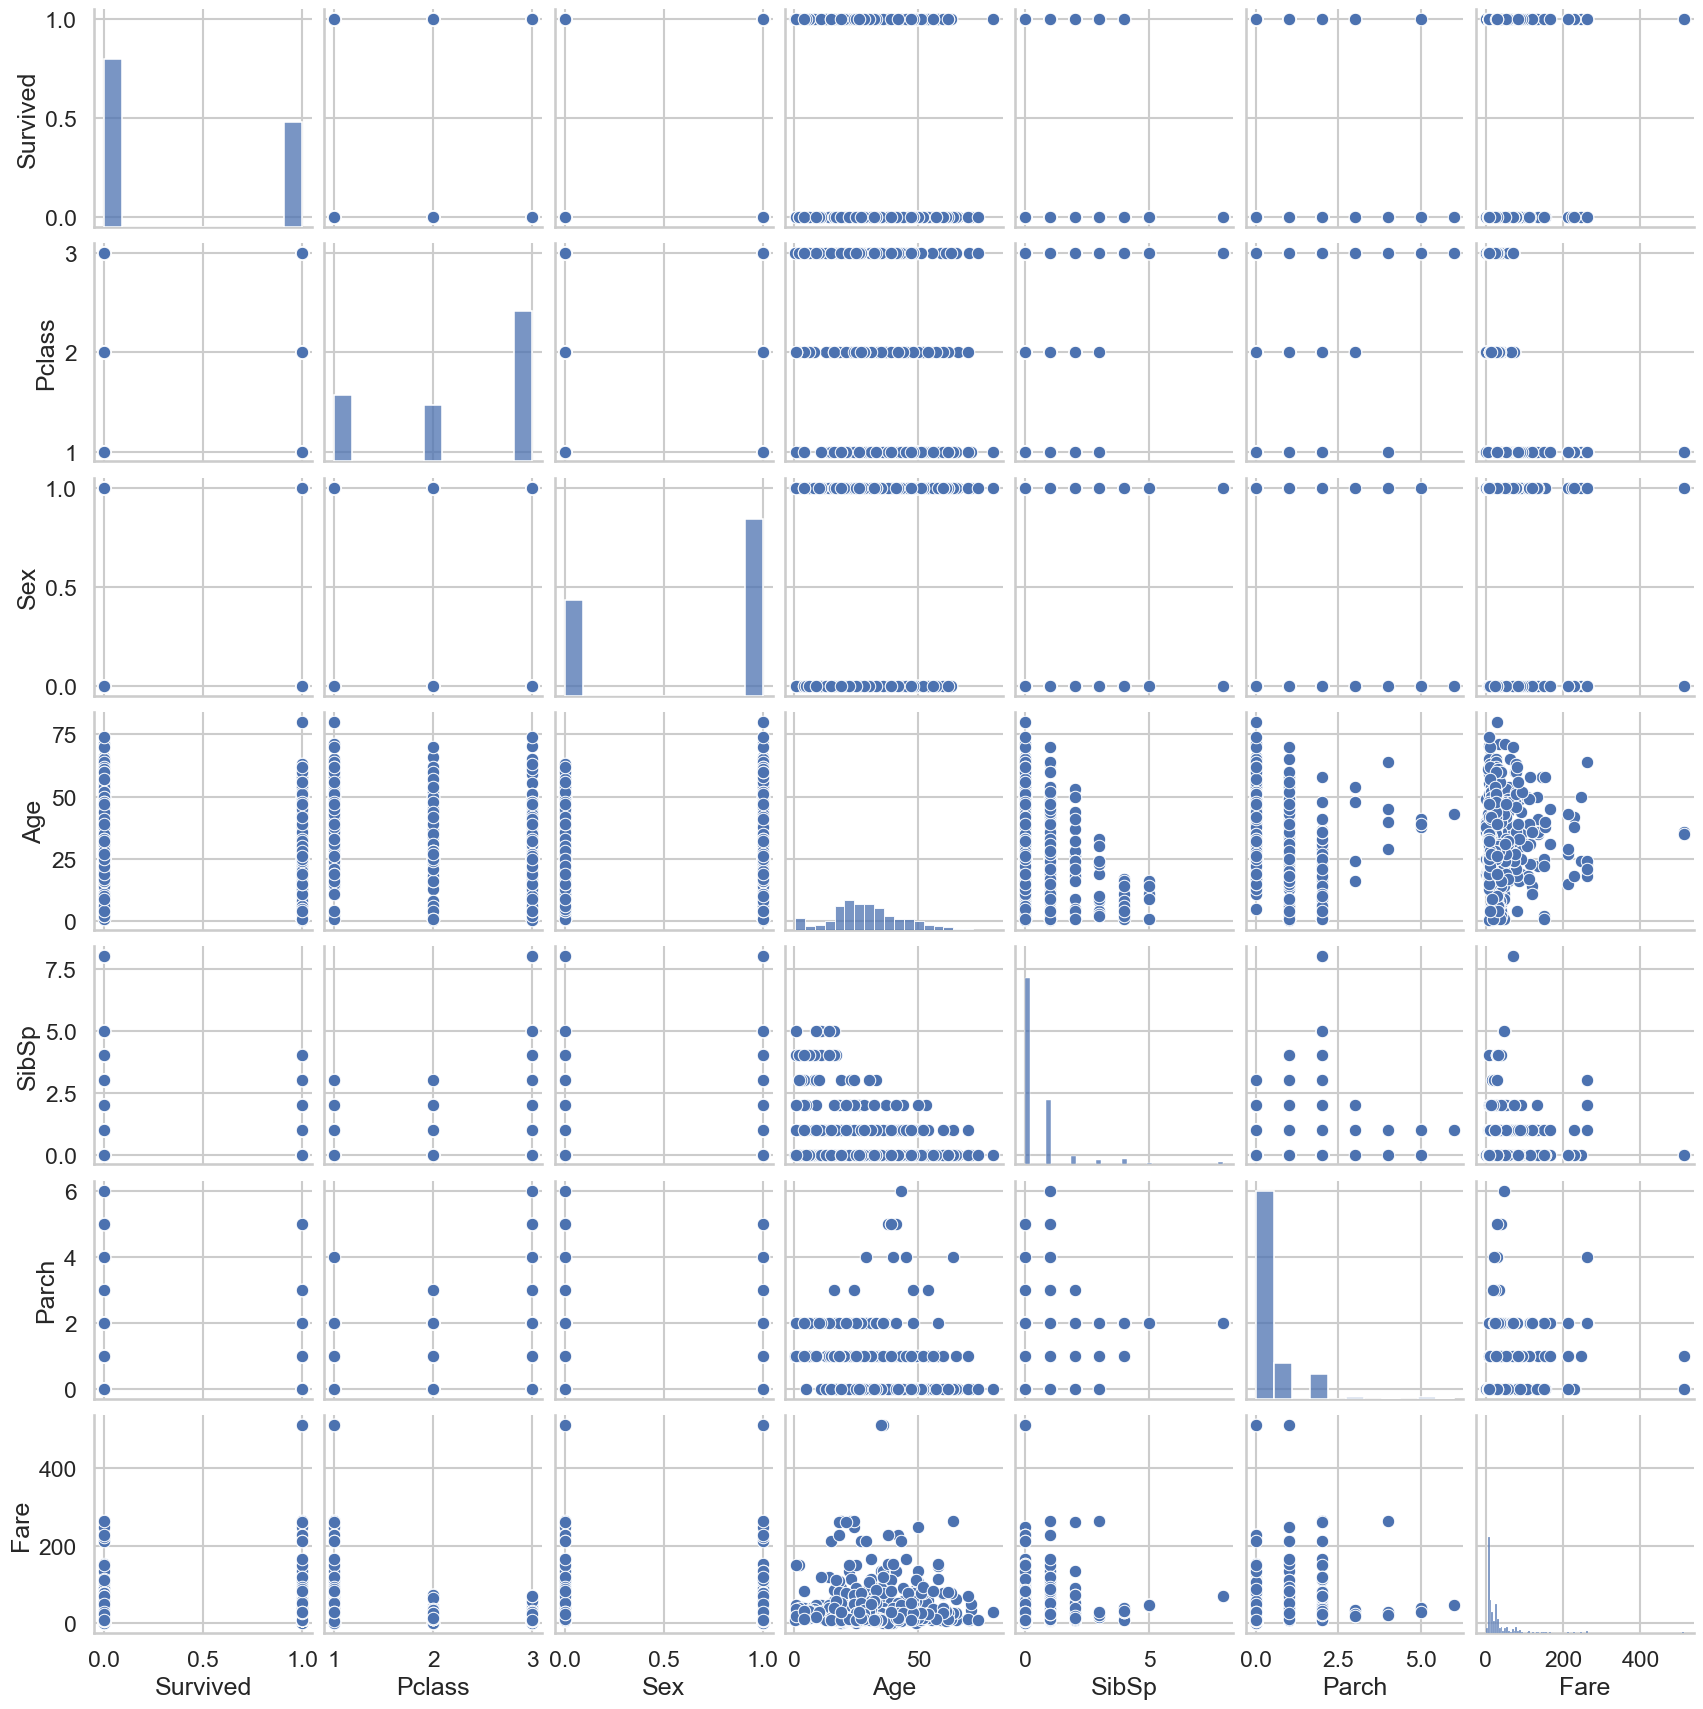

In [33]:
titanic_main_dataset = pd.read_csv('titanic.csv')
titanic_main_dataset['Sex'] = (titanic_main_dataset['Sex'] == 'male').astype(int)
titanic_main_dataset = titanic_main_dataset.drop(["PassengerId"], axis=1)
numericcols = titanic_main_dataset.select_dtypes(include=['number'])
sns.pairplot(titanic_main_dataset[numericcols.columns])


plt.show()


Ваші висновки:

Ті хто платили більше мали більше шансів вижити.
Молодші люди мали більше батьків на кораблі ніж старші.


**Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.**